In [1]:
import numpy as np
import pandas as pd
from tensorflow import keras
from tensorflow.keras import layers
from keras.preprocessing import image
from keras.preprocessing.image import load_img,img_to_array
from matplotlib import pyplot as plt
from tqdm import tqdm
from sklearn.model_selection import train_test_split


In [2]:
train = pd.read_csv('train.csv')
y = train.Label

In [4]:
train

,ID,Label
0,train_00000.png,0
1,train_00001.png,1
2,train_00002.png,1
3,train_00003.png,5
4,train_00004.png,5
...,...,...
2523,train_02523.png,0
2524,train_02524.png,0
2525,train_02525.png,3
2526,train_02526.png,0


In [39]:
#從image folder取出image
train_image = [ ]
for i in tqdm(range(train.shape[0])):
    img = image.load_img('train_images/'+train['ID'][i], target_size=(100,100,1), 
            grayscale=True)
    img = image.img_to_array(img)
    img = img/255
    train_image.append(img)

  0%|                                                                                         | 0/2528 [00:00<?, ?it/s]C:\Users\HHW\miniconda3\lib\site-packages\keras_preprocessing\image\utils.py:107: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
100%|█████████████████████████████████████████████████████████████████████████████| 2528/2528 [00:08<00:00, 285.27it/s]


In [40]:
X = np.array(train_image)

In [41]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

In [42]:
X_train.shape

(1769, 100, 100, 1)

In [43]:
#建立CNN model
model = keras.Sequential(name='CNNNetwork')
model.add(layers.Conv2D(filters = 32,
                        kernel_size = (2,2),
                        activation ='relu',
                        input_shape=(100,100,1)))
          
model.add(layers.MaxPool2D(2,2))

model.add(layers.Conv2D(filters = 128,
                        kernel_size = (2,2),
                        activation ='relu'))
model.add(layers.MaxPool2D(2,2))

model.add(layers.Conv2D(filters = 128,
                        kernel_size = (2,2),
                        activation ='relu'))
model.add(layers.MaxPool2D(2,2))

model.add(layers.Conv2D(filters = 64,
                        kernel_size = (2,2),
                        activation ='relu'))
model.add(layers.MaxPool2D(2,2))


model.add(layers.Flatten())
model.add(layers.Dense(128,activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dropout(0.25))
model.add(layers.Dense(10,activation='softmax'))


In [44]:
print(model.summary())

Model: "CNNNetwork"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 99, 99, 32)        160       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 49, 49, 32)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 48, 48, 128)       16512     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 24, 24, 128)      0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 23, 23, 128)       65664     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 11, 11, 128)      0

In [45]:
model.compile(optimizer = 'Adam',
             loss = keras.losses.sparse_categorical_crossentropy,
             metrics = ['accuracy'])

In [46]:
train_history = model.fit(x = X_train,
                          y = y_train,
                          validation_split = 0.2,
                          verbose = 2,
                          epochs = 70)

Epoch 1/100
45/45 - 10s - loss: 1.9800 - accuracy: 0.2184 - val_loss: 1.6963 - val_accuracy: 0.2712 - 10s/epoch - 221ms/step
Epoch 2/100
45/45 - 9s - loss: 1.7982 - accuracy: 0.2375 - val_loss: 1.6332 - val_accuracy: 0.2712 - 9s/epoch - 208ms/step
Epoch 3/100
45/45 - 9s - loss: 1.7044 - accuracy: 0.2926 - val_loss: 1.4230 - val_accuracy: 0.4040 - 9s/epoch - 208ms/step
Epoch 4/100
45/45 - 9s - loss: 1.4354 - accuracy: 0.4184 - val_loss: 1.2136 - val_accuracy: 0.5876 - 9s/epoch - 208ms/step
Epoch 5/100
45/45 - 9s - loss: 1.3510 - accuracy: 0.4247 - val_loss: 1.1045 - val_accuracy: 0.5876 - 9s/epoch - 209ms/step
Epoch 6/100
45/45 - 10s - loss: 1.2384 - accuracy: 0.4855 - val_loss: 1.0700 - val_accuracy: 0.5847 - 10s/epoch - 211ms/step
Epoch 7/100
45/45 - 9s - loss: 1.1998 - accuracy: 0.5159 - val_loss: 1.0132 - val_accuracy: 0.6045 - 9s/epoch - 211ms/step
Epoch 8/100
45/45 - 9s - loss: 1.1702 - accuracy: 0.5385 - val_loss: 1.0414 - val_accuracy: 0.6017 - 9s/epoch - 211ms/step
Epoch 9/100


Epoch 67/100
45/45 - 10s - loss: 0.1112 - accuracy: 0.9569 - val_loss: 0.1177 - val_accuracy: 0.9689 - 10s/epoch - 213ms/step
Epoch 68/100
45/45 - 10s - loss: 0.1186 - accuracy: 0.9569 - val_loss: 0.1432 - val_accuracy: 0.9689 - 10s/epoch - 214ms/step
Epoch 69/100
45/45 - 10s - loss: 0.1093 - accuracy: 0.9661 - val_loss: 0.2375 - val_accuracy: 0.9407 - 10s/epoch - 214ms/step
Epoch 70/100
45/45 - 10s - loss: 0.1116 - accuracy: 0.9668 - val_loss: 0.1595 - val_accuracy: 0.9605 - 10s/epoch - 212ms/step
Epoch 71/100
45/45 - 10s - loss: 0.1160 - accuracy: 0.9618 - val_loss: 0.1545 - val_accuracy: 0.9661 - 10s/epoch - 213ms/step
Epoch 72/100
45/45 - 10s - loss: 0.0808 - accuracy: 0.9696 - val_loss: 0.1806 - val_accuracy: 0.9605 - 10s/epoch - 212ms/step
Epoch 73/100
45/45 - 10s - loss: 0.0995 - accuracy: 0.9640 - val_loss: 0.2068 - val_accuracy: 0.9548 - 10s/epoch - 212ms/step
Epoch 74/100
45/45 - 10s - loss: 0.1760 - accuracy: 0.9477 - val_loss: 0.2327 - val_accuracy: 0.9407 - 10s/epoch - 213

In [47]:
import matplotlib.pyplot as plt
def show_train_history(show_train_value,test_value):
    plt.plot(train_history.history[show_train_value])
    plt.plot(train_history.history[test_value])
    plt.title('Train History')
    plt.ylabel(show_train_value)
    plt.xlabel('Epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

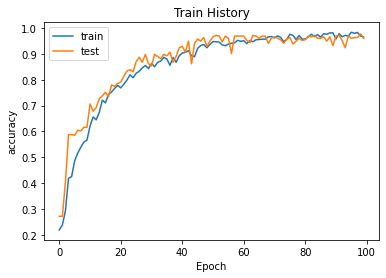

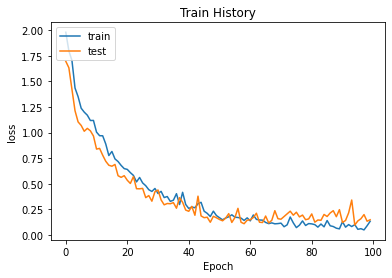

In [48]:
show_train_history('accuracy','val_accuracy')
show_train_history('loss','val_loss')

In [49]:
model.evaluate(X_test,y_test)

24/24 [==============================] - 1s 47ms/step - loss: 0.1369 - accuracy: 0.9605


[0.13693976402282715, 0.9604743123054504]

In [50]:
test = pd.read_csv('test.csv')
testid = test.ID

In [51]:
#從image folder取出image
test_image = [ ]
for i in tqdm(range(test.shape[0])):
    img = image.load_img('test_images/'+test['ID'][i], target_size=(100,100,1), 
            grayscale=True)
    img = image.img_to_array(img)
    img = img/255
    test_image.append(img)

  0%|                                                                                        | 0/10142 [00:00<?, ?it/s]C:\Users\HHW\miniconda3\lib\site-packages\keras_preprocessing\image\utils.py:107: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
100%|███████████████████████████████████████████████████████████████████████████| 10142/10142 [00:36<00:00, 280.53it/s]


In [52]:
test_image[10141]

array([[[0.7647059 ],
        [0.7764706 ],
        [0.8117647 ],
        ...,
        [0.7607843 ],
        [0.76862746],
        [0.72156864]],

       [[0.8392157 ],
        [0.8392157 ],
        [0.8352941 ],
        ...,
        [0.7490196 ],
        [0.78039217],
        [0.77254903]],

       [[0.74509805],
        [0.73333335],
        [0.7254902 ],
        ...,
        [0.77254903],
        [0.77254903],
        [0.76862746]],

       ...,

       [[0.69803923],
        [0.80784315],
        [0.8509804 ],
        ...,
        [0.7882353 ],
        [0.87058824],
        [0.9372549 ]],

       [[0.75686276],
        [0.9098039 ],
        [0.96862745],
        ...,
        [0.70980394],
        [0.7372549 ],
        [0.7607843 ]],

       [[0.8039216 ],
        [0.88235295],
        [0.9019608 ],
        ...,
        [0.6392157 ],
        [0.65882355],
        [0.6313726 ]]], dtype=float32)

In [53]:
testlabel = np.array(test_image)

In [54]:
testlabel[10141]

array([[[0.7647059 ],
        [0.7764706 ],
        [0.8117647 ],
        ...,
        [0.7607843 ],
        [0.76862746],
        [0.72156864]],

       [[0.8392157 ],
        [0.8392157 ],
        [0.8352941 ],
        ...,
        [0.7490196 ],
        [0.78039217],
        [0.77254903]],

       [[0.74509805],
        [0.73333335],
        [0.7254902 ],
        ...,
        [0.77254903],
        [0.77254903],
        [0.76862746]],

       ...,

       [[0.69803923],
        [0.80784315],
        [0.8509804 ],
        ...,
        [0.7882353 ],
        [0.87058824],
        [0.9372549 ]],

       [[0.75686276],
        [0.9098039 ],
        [0.96862745],
        ...,
        [0.70980394],
        [0.7372549 ],
        [0.7607843 ]],

       [[0.8039216 ],
        [0.88235295],
        [0.9019608 ],
        ...,
        [0.6392157 ],
        [0.65882355],
        [0.6313726 ]]], dtype=float32)

In [55]:
result = model.predict(testlabel)

In [56]:
result = np.argmax(result , axis=1)

In [57]:
result = pd.Series(result,name="Label")

In [58]:
submission = pd.concat([testid,result],axis = 1)

In [59]:
submission

,ID,Label
0,test_00000.png,1
1,test_00001.png,2
2,test_00002.png,5
3,test_00003.png,1
4,test_00004.png,2
...,...,...
10137,test_10137.png,4
10138,test_10138.png,1
10139,test_10139.png,1
10140,test_10140.png,3


In [60]:
submission.to_csv("submission.csv",index=False)